Let's import useful packages.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from matplotlib import pyplot as plt
from matplotlib import style
style.use(style='seaborn-whitegrid')

In [3]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns

Draw the line.

In [5]:
def draw_line(coeffs, c, y1, y2, title="I am a Hyperplane!"):
    """
    This function draws a line.
    Ex: ax + by + c = 0 is the general equation of the line.
    
    x1 = -(by1 + c) / a; x2 = -(by2 + c) / a
    We will then draw the line between (x1, y1) and (x2, y2).
    """
    a, b = coeffs
    
    x1 = -(b * y1 + c) / a
    x2 = -(b * y2 + c) / a
    
    p1 = [x1, y1]
    p2 = [x2, y2]
    points = np.array([p1, p2])
    
    sns.lineplot(x=points[:, 0], y=points[:, 1], color='g')
    plt.title(label=title)
    return None

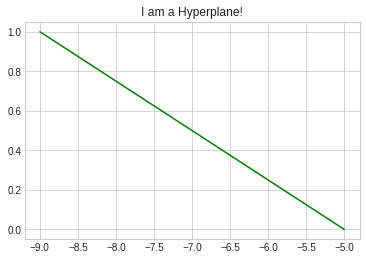

In [6]:
draw_line(coeffs=[1, 4], c=5, y1=0, y2=1)

Generate the data.

In [7]:
def generate_data(rsizes, dim=2, in_df=True):
    """
    This function generates the data which follows normal distribution.
    """
    np.random.seed(seed=42)
    
    positives = rsizes[0]
    negatives = rsizes[1]
    
    Xp = np.random.normal(loc=0.0, scale=0.05, size=(positives, dim))
    yp = np.array([1] * positives).reshape(-1, 1)
    Xn = np.random.normal(loc=0.13, scale=0.02, size=(negatives, dim))
    yn = np.array([0] * negatives).reshape(-1, 1)
    
    X = np.vstack(tup=(Xp, Xn))
    y = np.vstack(tup=(yp, yn))
    
    if in_df:
        data = np.hstack(tup=(X, y))
        df = pd.DataFrame(data=data, columns=['F1', 'F2', 'T'])
        return df
    else:
        return (X, y)

In [8]:
df = generate_data(rsizes=(100, 80))
display(df)

,F1,F2,T
0,0.024836,-0.006913,1.0
1,0.032384,0.076151,1.0
2,-0.011708,-0.011707,1.0
3,0.078961,0.038372,1.0
4,-0.023474,0.027128,1.0
...,...,...,...
175,0.136218,0.159507,0.0
176,0.147153,0.126801,0.0
177,0.129620,0.109949,0.0
178,0.129630,0.124227,0.0


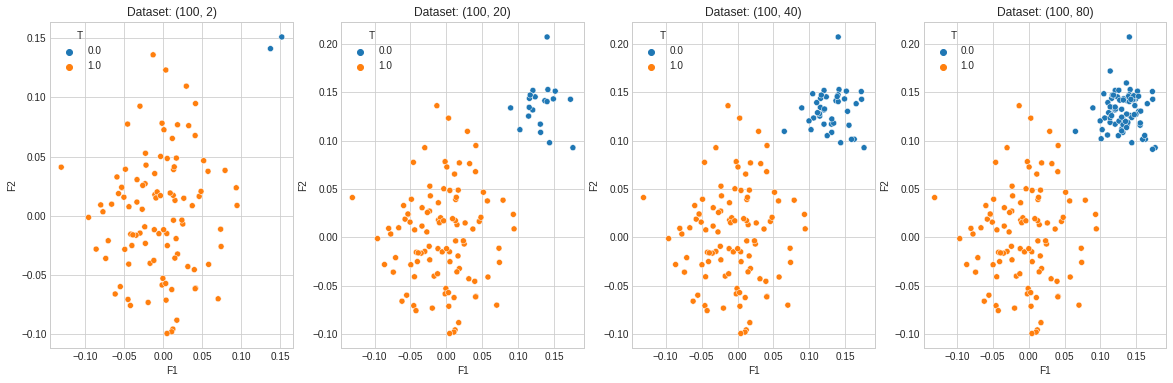

In [9]:
ratios = [(100, 2), (100, 20), (100, 40), (100, 80)]
plt.figure(figsize=(20, 6))

for (j, ratio) in enumerate(ratios):
    plt.subplot(1, len(ratios), j+1)
    df = generate_data(rsizes=ratio)
    sns.scatterplot(data=df, x='F1', y='F2', hue='T')
    plt.title('Dataset: {}'.format(ratio))
plt.show()

The model and the plot.

In [10]:
def build_model_plot_decision_hyperplane(ratios, regparams, model='svc'):
    """
    This function builds the given model, and
    plots the decision surfaces for given regularization parameters.
    """
    plt.figure(figsize=(25, 25))
    title = "Dataset: {} | Model: {} | C: {}"
    datasets = len(ratios)
    params = len(regparams)
    pi = 1
    
    for (j, ratio) in enumerate(ratios):
        X, y = generate_data(rsizes=ratio, in_df=False)
        
        for param in regparams:
            plt.subplot(datasets, params, pi)
            sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y[:, 0])
            plot_title = title.format(ratio, model.upper(), param)
            
            if model == 'svc':
                clf = SVC(C=param, kernel='linear')
            elif model == 'lr':
                clf = LogisticRegression(C=param)
            
            clf.fit(X=X, y=y)
            
            coeffs = clf.coef_[0]
            c = clf.intercept_[0]
            y1 = np.min(X)
            y2 = np.max(X)
            draw_line(coeffs=coeffs, c=c, y1=y1, y2=y2, title=plot_title)
            
            pi += 1
            
    plt.show()
    return None

---

__Task 1: SVC__

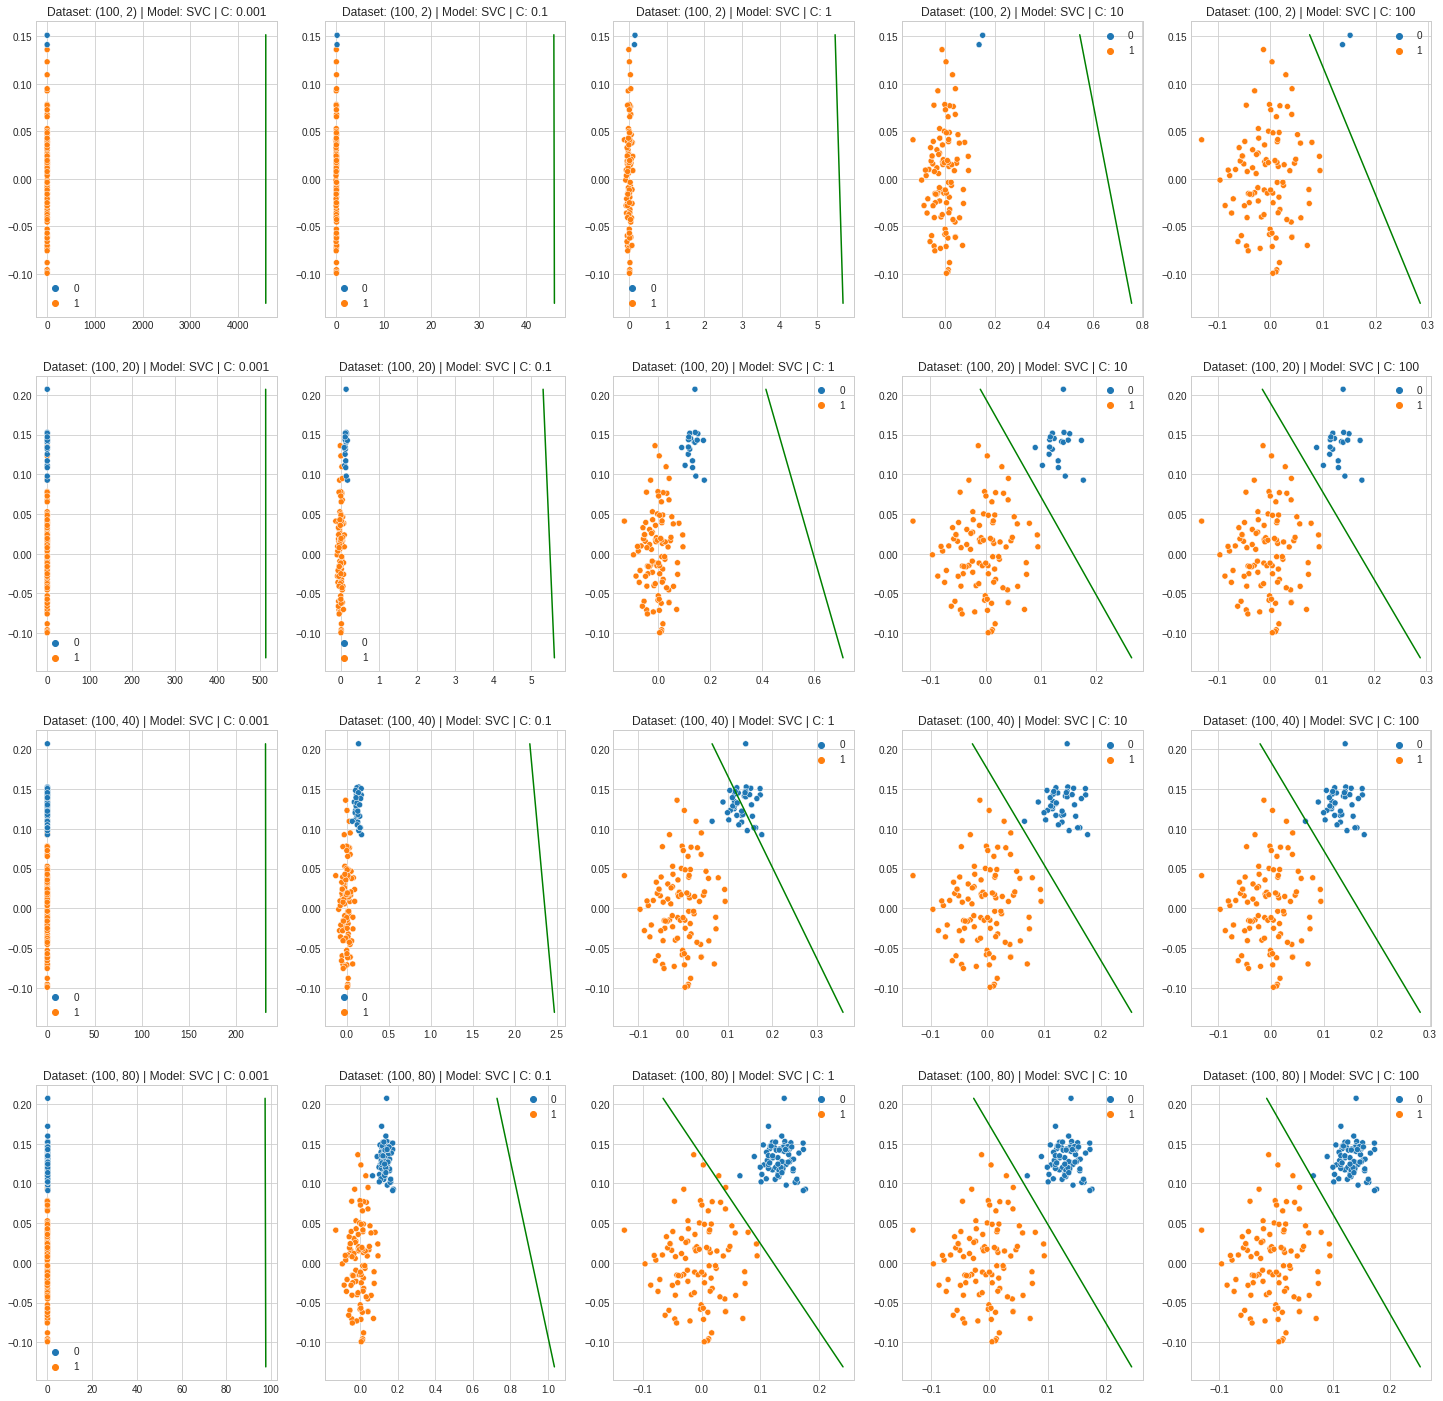

In [11]:
ratios = [(100, 2), (100, 20), (100, 40), (100, 80)]
regparams = hpara = [0.001, 0.1, 1, 10, 100]
build_model_plot_decision_hyperplane(ratios=ratios, regparams=regparams)

__Conclusion:__

The data is an imbalanced data. Positive labels are more than negative labels.

Here, $C$ is a parameter that regulates the effectiveness of the model. If $C$ is high, the model overfits and if $C$ is low, the model underfits. The above gridplot depicts the bias-variance trageoff of the SVC model in action.

- When $C=0.001$ or $C=0.1$, we barely see the hyperplane classifying the data points. This is a high bias model as $C$ is very low.
- When $C=1$, $C=10$, we can see the model is trying to learn something out of data. These are the ideal values of the parameter $C$.
- When $C=100$, we observe that model starts to overfit and classifies both positive and negative points successfully. This is a high variance model as $C$ is very high. The model is memorizing but not learning.

---

__Task 2: Logistic Regression__

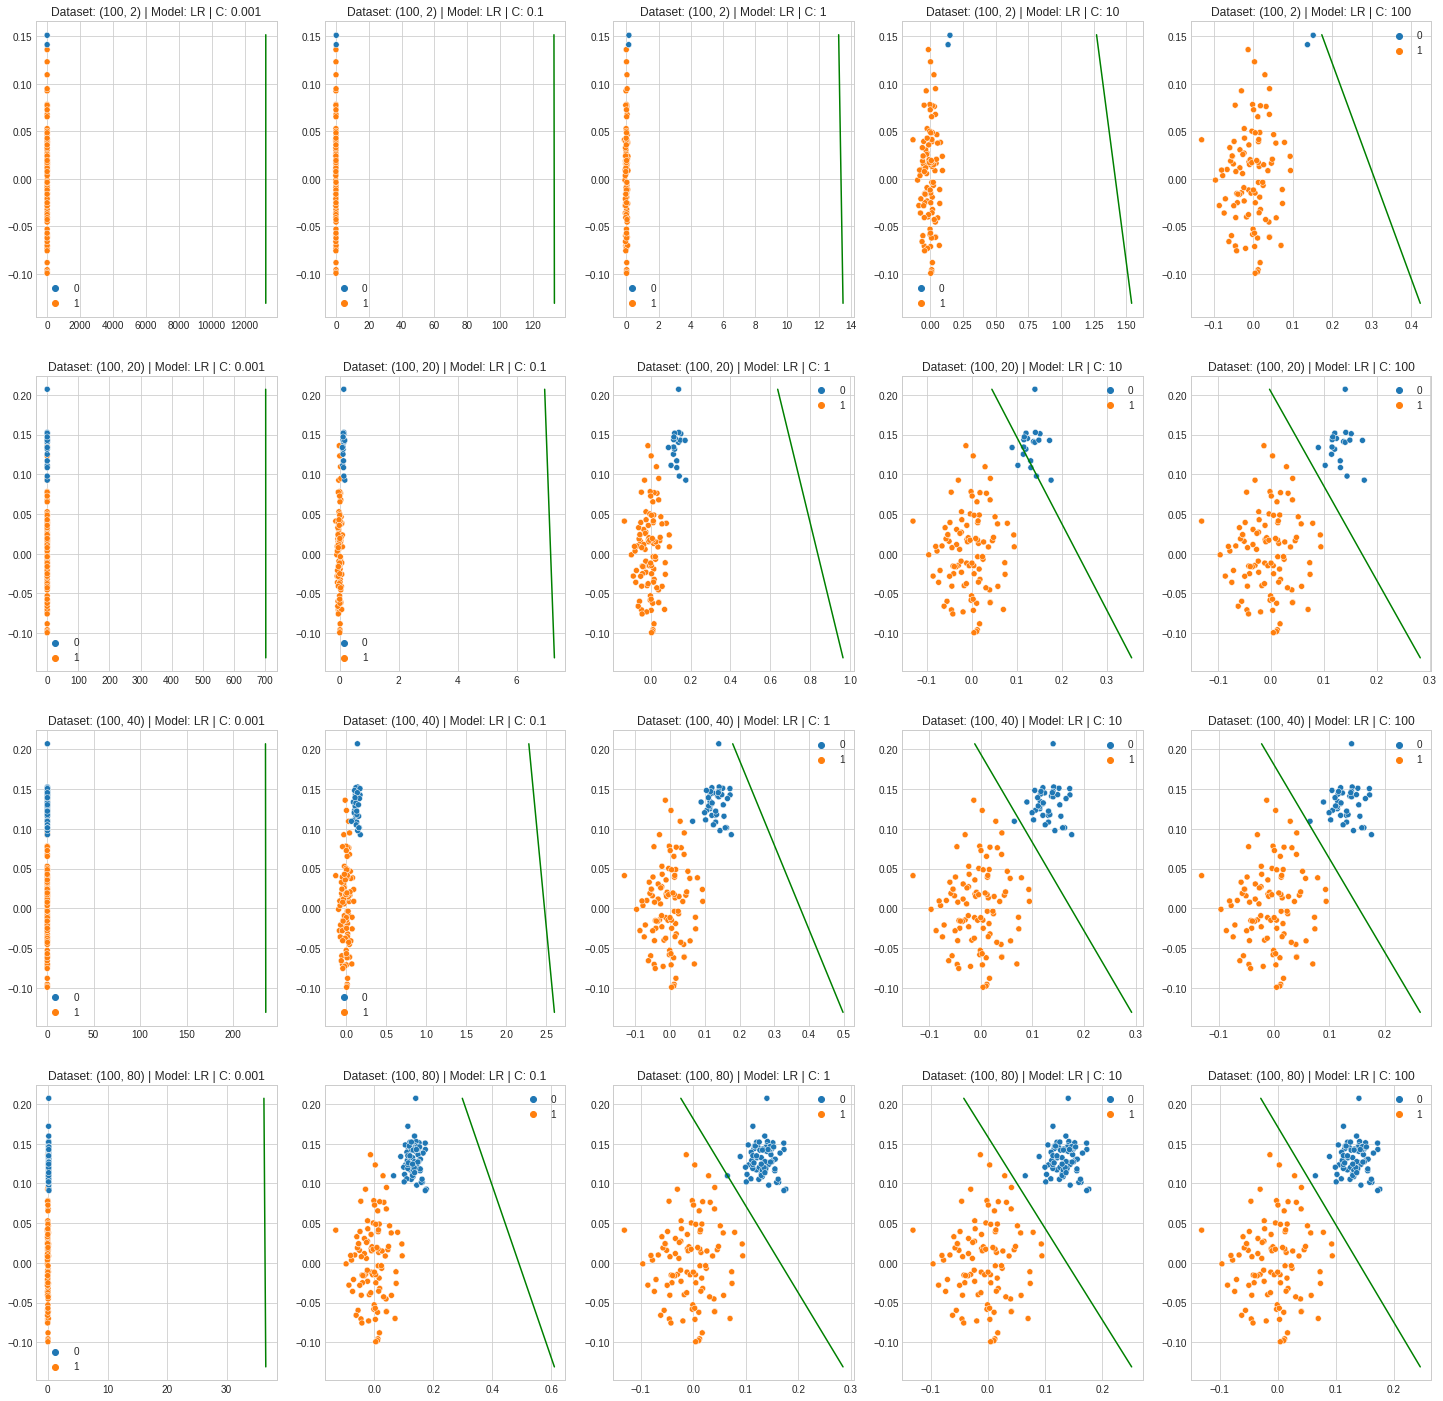

In [12]:
ratios = [(100, 2), (100, 20), (100, 40), (100, 80)]
regparams = hpara = [0.001, 0.1, 1, 10, 100]
build_model_plot_decision_hyperplane(ratios=ratios, regparams=regparams, model='lr')

__Conclusion:__

The data is an imbalanced data. Positive labels are more than negative labels.

Here, $C$ is a parameter that regulates the effectiveness of the model. If $C$ is high, the model overfits and if $C$ is low, the model underfits. The above gridplot depicts the bias-variance trageoff of the Logistic Regression model in action.

- When $C=0.001$ or $C=0.1$, we barely see the hyperplane classifying the data points. This is a high bias model as $C$ is very low.
- When $C=1$, $C=10$, we can see the model is trying to learn something out of data. These are the ideal values of the parameter $C$.
- When $C=100$, we observe that model starts to overfit and classifies both positive and negative points successfully. This is a high variance model as $C$ is very high. The model is memorizing but not learning.

---

End of the file.